In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file
df = pd.read_csv('../CSV/df_sp500.csv')

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Create binary target (1 for price up, 0 for price down)
df['Target'] = (df['Returns'] > 0).astype(int)

# Create features (using previous n days' returns)
n_days = 5  # Number of previous days to use as features
for i in range(1, n_days + 1):
    df[f'Return_lag_{i}'] = df['Returns'].shift(i)

# Drop NaN values
df = df.dropna()

# Prepare features and target
X = df[[f'Return_lag_{i}' for i in range(1, n_days + 1)]]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print(f"Model accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model accuracy: 0.5179

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.52      1.00      0.68       130

    accuracy                           0.52       251
   macro avg       0.26      0.50      0.34       251
weighted avg       0.27      0.52      0.35       251



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


=== Résultats de la validation croisée ===
Scores par fold: [0.51792829 0.54       0.52       0.556      0.552     ]
Score moyen: 0.537 (+/- 0.032)


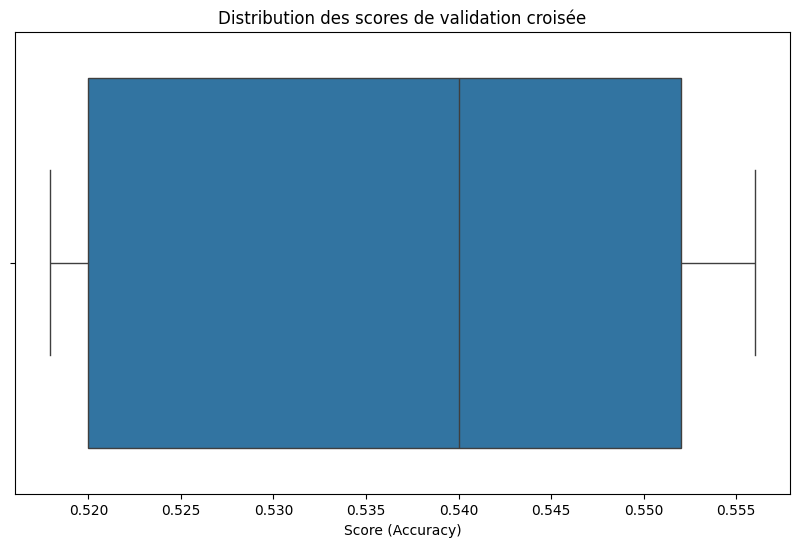


=== Évaluation sur l'ensemble de test ===
Précision du modèle: 0.5179

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.52      1.00      0.68       130

    accuracy                           0.52       251
   macro avg       0.26      0.50      0.34       251
weighted avg       0.27      0.52      0.35       251



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

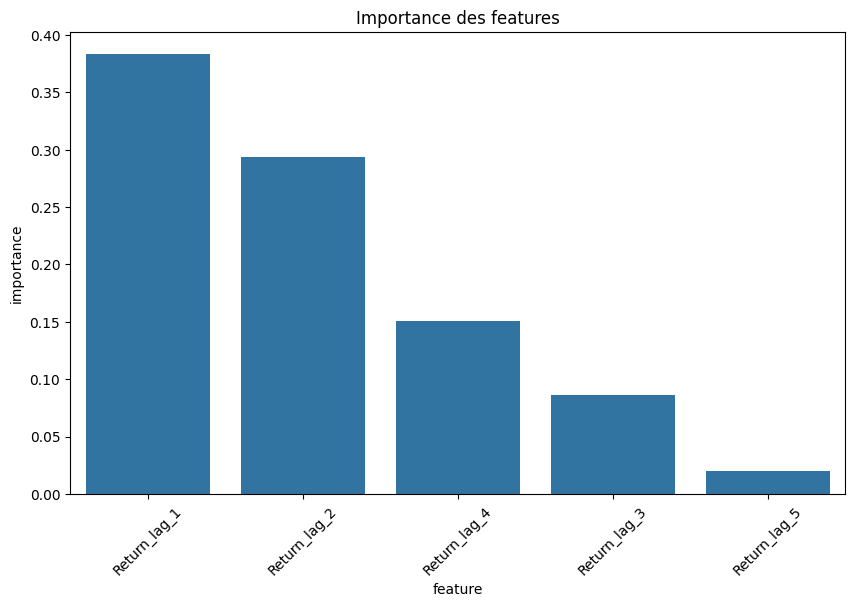

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('../CSV/df_sp500.csv')

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Create binary target (1 for price up, 0 for price down)
df['Target'] = (df['Returns'] > 0).astype(int)

# Create features (using previous n days' returns)
n_days = 5  # Number of previous days to use as features
for i in range(1, n_days + 1):
    df[f'Return_lag_{i}'] = df['Returns'].shift(i)

# Drop NaN values
df = df.dropna()

# Prepare features and target
X = df[[f'Return_lag_{i}' for i in range(1, n_days + 1)]]
y = df['Target']

# Configuration de la validation croisée
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
model = LogisticRegression(random_state=42)

# Effectuer la validation croisée
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Afficher les résultats de la validation croisée
print("\n=== Résultats de la validation croisée ===")
print(f"Scores par fold: {cv_scores}")
print(f"Score moyen: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Visualiser les résultats de la validation croisée
plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_scores)
plt.title('Distribution des scores de validation croisée')
plt.xlabel('Score (Accuracy)')
plt.show()

# Entraînement final sur l'ensemble complet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Afficher les résultats finaux
print("\n=== Évaluation sur l'ensemble de test ===")
print(f"Précision du modèle: {accuracy_score(y_test, y_pred):.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Visualiser l'importance des features
feature_importance = pd.DataFrame({
    'feature': [f'Return_lag_{i}' for i in range(1, n_days + 1)],
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='feature', y='importance')
plt.title('Importance des features')
plt.xticks(rotation=45)
plt.show()